# bootstrapx — Quick Start Guide\n\nThis notebook walks through the core features of `bootstrapx`.

In [1]:
import numpy as np
from bootstrapx import bootstrap
rng = np.random.default_rng(42)

## 1. BCa — Default Method (Recommended)

In [2]:
data = rng.normal(loc=5.0, scale=2.0, size=200)
result = bootstrap(data, np.mean, method='bca', n_resamples=9999, random_state=42)
print(result)
print(f'95% CI: [{result.confidence_interval.low:.4f}, {result.confidence_interval.high:.4f}]')

BootstrapResult(method='bca', theta_hat=4.9391, se=0.123756, CI=[4.70113, 5.18486])
95% CI: [4.7011, 5.1849]


## 2. Compare CI Methods

In [3]:
data_skewed = rng.exponential(2.0, size=150)
for method in ['percentile', 'basic', 'bca']:
    r = bootstrap(data_skewed, np.mean, method=method, n_resamples=9999, random_state=42)
    ci = r.confidence_interval
    print(f'{method:>12s}: [{ci.low:.3f}, {ci.high:.3f}]  se={r.standard_error:.3f}')

  percentile: [1.644, 2.265]  se=0.158
       basic: [1.624, 2.245]  se=0.158
         bca: [1.668, 2.298]  se=0.158


## 3. Time Series — Stationary Bootstrap

In [4]:
ts = np.cumsum(rng.standard_normal(500))
result_ts = bootstrap(ts, np.mean, method='stationary', mean_block=15.0,
                      n_resamples=5000, random_state=42)
print(result_ts)

BootstrapResult(method='stationary', theta_hat=-9.15325, se=2.27971, CI=[-13.7472, -4.93353])


## 4. Cluster Bootstrap

In [5]:
school_ids = np.repeat(np.arange(20), 30)  # 20 schools x 30 students
scores = rng.normal(loc=70 + school_ids * 0.5, scale=10)
result_cl = bootstrap(scores, np.mean, method='cluster',
                      cluster_ids=school_ids, n_resamples=5000, random_state=0)
print(result_cl)

BootstrapResult(method='cluster', theta_hat=74.6873, se=0.771617, CI=[73.1876, 76.1623])


## 5. Custom Statistic — IQR

In [6]:
def iqr(x):
    return float(np.percentile(x, 75) - np.percentile(x, 25))
result_iqr = bootstrap(rng.lognormal(0, 1, 300), iqr, method='bca',
                       n_resamples=9999, random_state=42)
print(f'IQR = {result_iqr.theta_hat:.3f}')
print(f'CI  = [{result_iqr.confidence_interval.low:.3f}, {result_iqr.confidence_interval.high:.3f}]')

IQR = 1.173
CI  = [0.944, 1.423]


## 6. Visualize Bootstrap Distribution

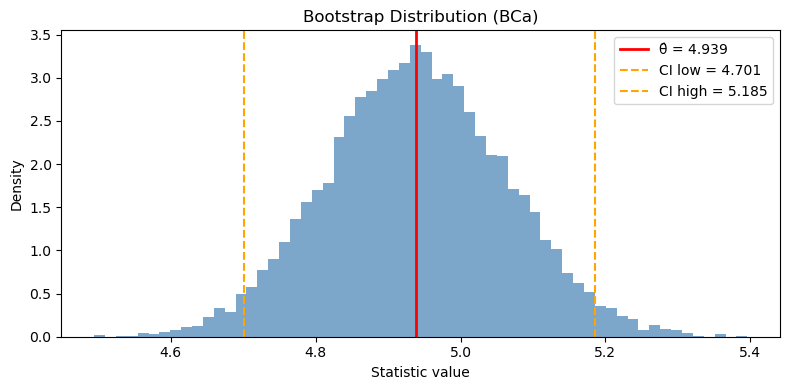

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(result.bootstrap_distribution, bins=60, density=True, alpha=0.7, color='steelblue')
ax.axvline(result.theta_hat, color='red', lw=2, label=f'θ̂ = {result.theta_hat:.3f}')
ax.axvline(result.confidence_interval.low, color='orange', ls='--', label=f'CI low = {result.confidence_interval.low:.3f}')
ax.axvline(result.confidence_interval.high, color='orange', ls='--', label=f'CI high = {result.confidence_interval.high:.3f}')
ax.set_xlabel('Statistic value')
ax.set_ylabel('Density')
ax.set_title('Bootstrap Distribution (BCa)')
ax.legend()
plt.tight_layout()
plt.show()